1. Load raster from EE
2. Load style file from drive
3. Generate STAC item   
    a. generate bounding box  
    b. start and end date from file  
    c. Create COG  
    d. Generate thumbnail and save it  
   

In [ ]:
# !pip install pystac[validation]

In [ ]:
# ! pip install pystac
# ! pip install rasterio
# ! pip install shapely

In [33]:
# !pip install python-dateutil

In [46]:
import os
import datetime
import rasterio
import urllib.request
import pystac
import dateutil

from shapely.geometry import Polygon, mapping
from tempfile import TemporaryDirectory

from pystac.extensions.eo import Band, EOExtension
from pystac.extensions.view import ViewExtension
from pystac.extensions.projection import ProjectionExtension
import pystac.extensions.raster 

In [2]:
os.getcwd()

'/home/nirzaree/Code/GitClones/STAC-spec'

In [ ]:
# Set the temporary directory to store source data
# tmp_dir = TemporaryDirectory()
img_path = os.path.join('data',
                        'saraikela-kharsawan_gobindpur_2019-07-01_2020-06-30_LULCmap_10m.tif')

In [41]:
img_path

'data/saraikela-kharsawan_gobindpur_2019-07-01_2020-06-30_LULCmap_10m.tif'

In [52]:
with rasterio.open(img_path) as r:
    data = r.read()

In [53]:
data.shape

(1, 3678, 4173)

In [54]:
import matplotlib.pyplot as plt

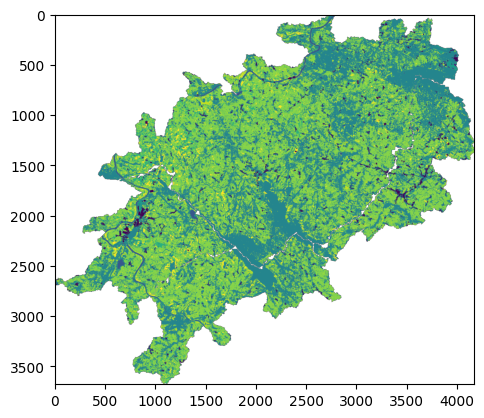

In [55]:
plt.imshow(data.reshape((3678,4173)))

In [56]:
def get_bbox_and_footprint(raster):
    with rasterio.open(raster) as r:
        crs = r.crs
        res = r.res
        transform = r.transform
        linear_units = crs.linear_units
        bounds = r.bounds
        bbox = [bounds.left, bounds.bottom, bounds.right, bounds.top]
        footprint = Polygon([
            [bounds.left, bounds.bottom],
            [bounds.left, bounds.top],
            [bounds.right, bounds.top],
            [bounds.right, bounds.bottom]
        ])       
        tags = r.tags()
        date_str = tags.get("TIFFTAG_DATETIME")
        print(date_str)
        return (bbox, mapping(footprint),crs,res,transform,linear_units)

In [58]:
bbox, footprint,crs,res,transform,linear_units = get_bbox_and_footprint(img_path)

None


In [18]:
filename = os.path.basename(img_path)
filename

'saraikela-kharsawan_gobindpur_2019-07-01_2020-06-30_LULCmap_10m.tif'

In [19]:
district,block,start_date,end_date,layer_description,scale = filename.split('_')

In [31]:
print("district =",district,
      ",\nblock = ",block,
      "\nstart_date = ",start_date,
      "\nend_date = ",end_date,
      "\nlayer_description = ",layer_description,
      "\nscale = ",scale
      )

district = saraikela-kharsawan ,
block =  gobindpur 
start_date =  2019-07-01 
end_date =  2020-06-30 
layer_description =  LULCmap 
scale =  10m.tif


In [59]:
start_date

'2019-07-01'

In [60]:
end_date

'2020-06-30'

In [61]:
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        dateutil.parser.parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [ ]:
def get_start_date_and_end_date(filename):
    try:
        district,block,start_date,end_date,layer_description,scale = filename.split('_')
        if (is_date(start_date) & (is_date(end_date))):
            
    except Exception as e:
        print("File format not as expected in {filename}")

In [49]:
from pystac.extensions.raster import DataType

In [62]:
item = pystac.Item(id='raster-poc',
                      geometry=footprint,
                      bbox=bbox,
                      datetime=datetime.datetime.now(),
                    #   start_datetime = start_date,
                    #   end_datetime=end_date,
                      properties={                        
                      })

In [63]:
from pystac.extensions.raster import RasterExtension

In [64]:
raster_ext = RasterExtension.ext(item, add_if_missing=True)

ExtensionTypeError: RasterExtension does not apply to type 'Item'

In [ ]:
# item.validate()

In [ ]:
with rasterio.open(img_path) as r:
    img = r.read()

In [ ]:
# !pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
r.count

In [ ]:
img2 = img.reshape(img.shape[1],img.shape[2])

In [ ]:
img2.shape

In [ ]:
vis_params = {
    'min': 0,
    'max': 12,
    'palette': ['#000000',  # 0 Black- background
            '#ff0000',   # 1 Red- builtup
            '#74ccf4', # 2 Light Blue- kharif water
            '#1ca3ec', # 3 Blue- kharif and rabi water
            '#0f5e9c', # 4 Dark Blue- kharif and rabi and zaid water
            '#f1c232', # 5 Yellow- croplands
            '#38761d', # 6 Dark Green- Tree/Forests
            '#A9A9A9', # 7 Gray- barren lands
            '#f1c232', # 8 Yellow- Single Kharif Cropping
            '#f59d22', # 9 Mustard- Single Non-Kharif Cropping
            '#e68600', # 10 Orange- Double Cropping
            '#b3561d', # 11 Brown- Triple Cropping
            '#c39797' # 12 Mauve- Shrubs_Scrubs
            ]
    }

In [ ]:
import matplotlib

In [ ]:
vis_params['palette']

In [ ]:
cmap = matplotlib.colors.ListedColormap(vis_params['palette'])
norm = matplotlib.colors.BoundaryNorm(range(len(vis_params['palette'])), cmap.N)


In [ ]:
plt.imshow(img2,interpolation='none', cmap=cmap, norm=norm) #https://stackoverflow.com/questions/32766062/how-to-determine-the-colours-when-using-matplotlib-pyplot-imshow

In [ ]:
import ee

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project='ee-corestackdev')

In [ ]:
gobindpur_2023_lulc = ee.Image('projects/ee-corestackdev/assets/apps/mws/jharkhand/saraikela-kharsawan/gobindpur/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m')

In [ ]:
gobindpur_2023_lulc = ee.Image('projects/ee-corestackdev/assets/apps/mws/jharkhand/dumka/masalia/dumka_masalia_2023-07-01_2024-06-30_LULCmap_10m')

In [ ]:
gobindpur_2023_lulc

In [ ]:
import geemap

In [ ]:
vis_params = {
    'min': 0,
    'max': 12,
    'palette': ['#000000',  # 0 Black- background
            '#ff0000',   # 1 Red- builtup
            '#74ccf4', # 2 Light Blue- kharif water
            '#1ca3ec', # 3 Blue- kharif and rabi water
            '#0f5e9c', # 4 Dark Blue- kharif and rabi and zaid water
            '#f1c232', # 5 Yellow- croplands
            '#38761d', # 6 Dark Green- Tree/Forests
            '#A9A9A9', # 7 Gray- barren lands
            '#f1c232', # 8 Yellow- Single Kharif Cropping
            '#f59d22', # 9 Mustard- Single Non-Kharif Cropping
            '#e68600', # 10 Orange- Double Cropping
            '#b3561d', # 11 Brown- Triple Cropping
            '#c39797' # 12 Mauve- Shrubs_Scrubs
            ]
    }

In [ ]:
m = geemap.Map()
m.add_layer(gobindpur_2023_lulc,vis_params)
m

In [ ]:
m

In [ ]:
import PIL

In [ ]:
size = (128,128)

In [ ]:
image = Image.fromarray(img2)
image.thumbnail(size)
image.save(thumbnail_path)

In [ ]:
def displayMap(roi_boundary, image):
    centroid = roi_boundary.geometry().centroid()
    coordinates = centroid.coordinates()
    centerLat = coordinates.get(1).getInfo()
    centerLon = coordinates.get(0).getInfo()
    mapObj = folium.Map(width='100%', height='100%', location=[centerLat, centerLon], zoom_start=50)

    # Sattelite image visual parameters
    vis_params = {
        'min': 0,
        'max': 12,
        'palette': ['#000000',  # 0 Black- background
                '#ff0000',   # 1 Red- builtup
                '#74ccf4', # 2 Light Blue- kharif water
                '#1ca3ec', # 3 Blue- kharif and rabi water
                '#0f5e9c', # 4 Dark Blue- kharif and rabi and zaid water
                '#f1c232', # 5 Yellow- croplands
                '#38761d', # 6 Dark Green- Tree/Forests
                '#A9A9A9', # 7 Gray- barren lands
                '#f1c232', # 8 Yellow- Single Kharif Cropping
                '#f59d22', # 9 Mustard- Single Non-Kharif Cropping
                '#e68600', # 10 Orange- Double Cropping
                '#b3561d', # 11 Brown- Triple Cropping
                '#c39797' # 12 Mauve- Shrubs_Scrubs
                ]
        }

    map_id_dict = ee.Image(image).getMapId(vis_params)

    folium.TileLayer(
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr='Esri',
            name='Esri Satellite',
            overlay=True,
            control=True
        ).add_to(mapObj)

    folium.raster_layers.TileLayer(
                    tiles = map_id_dict['tile_fetcher'].url_format,
                    attr = 'Google Earth Engine',
                    name = 'Sentinel 2 image',
                    overlay = True,
                    control = True
                    ).add_to(mapObj)

    roi_geojson = folium.GeoJson(data=roi_boundary.getInfo(), name='ROI Boundary', style_function=lambda x: {'color':'black', 'fillColor': 'transparent', 'fillOpacity': 0})
    # roi_geojson.add_to(mapObj)

    # Add legend
    legend_html = '''
    <div style="position: fixed; bottom: 200px; right: 100px; z-index:1000; border:2px solid black; background-color:white;
        border-radius:5px; padding:10px; font-size:14px;">
        <p style="font-weight: bold;">Legend</p>
        <p><span style="color: black; font-size: 16px;">■</span> ROI Boundary </p>
        <p><span style="color: #ff0000; font-size: 16px;">■</span> Built-up </p>
        <p><span style="color: #74ccf4; font-size: 16px;">■</span> Water in Kharif </p>
        <p><span style="color: #1ca3ec; font-size: 16px;">■</span> Water in Kharif and Rabi </p>
        <p><span style="color: #0f5e9c; font-size: 16px;">■</span> Water in Kharif, Rabi and Zaid </p>
        <p><span style="color: #38761d; font-size: 16px;">■</span> Tree/Forests </p>
        <p><span style="color: #A9A9A9; font-size: 16px;">■</span> Barren Lands </p>
        <p><span style="color: #f1c232; font-size: 16px;">■</span> Single-Kharif Cropping </p>
        <p><span style="color: #f59d22; font-size: 16px;">■</span> Single Non-Kharif Cropping </p>
        <p><span style="color: #e68600; font-size: 16px;">■</span> Double Cropping </p>
        <p><span style="color: #b3561d; font-size: 16px;">■</span> Triple Cropping </p>
        <p><span style="color: #c39797; font-size: 16px;">■</span> Shrubs and Scrubs </p>
    </div>
    '''
    # mapObj.get_root().html.add_child(folium.Element(legend_html))

    mapObj.add_child(folium.LayerControl())
    display(mapObj)

In [66]:
import pystac
from pystac.extensions.raster import RasterExtension, RasterBand
from pystac.extensions.projection import ProjectionExtension
from datetime import datetime
import json

def create_raster_stac_catalog():
    """
    Create a STAC catalog with raster extension items including data type and nodata values.
    """
    
    # Create the main catalog
    catalog = pystac.Catalog(
        id="raster-catalog",
        description="Sample raster data catalog with raster extension",
        title="Raster Data Catalog"
    )
    
    # Create a collection for satellite imagery
    collection = pystac.Collection(
        id="satellite-imagery",
        description="Satellite imagery collection with raster metadata",
        extent=pystac.Extent(
            spatial=pystac.SpatialExtent([[-180, -90, 180, 90]]),
            temporal=pystac.TemporalExtent([[datetime(2023, 1, 1), datetime(2023, 12, 31)]])
        ),
        title="Satellite Imagery Collection",
        license="CC-BY-4.0"
    )
    
    # Add the collection to the catalog
    catalog.add_child(collection)
    
    # Create sample raster items with different data types and configurations
    items = []
    
    # Item 1: Landsat-like multispectral imagery
    item1 = create_multispectral_item()
    items.append(item1)
    
    # Item 2: Digital Elevation Model
    item2 = create_dem_item()
    items.append(item2)
    
    # Item 3: Land Cover Classification
    item3 = create_landcover_item()
    items.append(item3)
    
    # Add items to collection
    for item in items:
        collection.add_item(item)
    
    return catalog

def create_multispectral_item():
    """Create a multispectral imagery item with raster extension."""
    
    # Create the item
    item = pystac.Item(
        id="landsat-sample-001",
        geometry={
            "type": "Polygon",
            "coordinates": [[
                [-122.5, 37.7],
                [-122.3, 37.7],
                [-122.3, 37.9],
                [-122.5, 37.9],
                [-122.5, 37.7]
            ]]
        },
        bbox=[-122.5, 37.7, -122.3, 37.9],
        datetime=datetime(2023, 6, 15),
        properties={
            "platform": "landsat-8",
            "instruments": ["oli", "tirs"]
        }
    )
    
    # Add assets with raster extension
    # Red band
    red_asset = pystac.Asset(
        href="https://example.com/landsat/red.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Red Band",
        description="Landsat 8 Red Band (Band 4)"
    )
    item.add_asset("red", red_asset)
    
    # Green band
    green_asset = pystac.Asset(
        href="https://example.com/landsat/green.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Green Band",
        description="Landsat 8 Green Band (Band 3)"
    )
    item.add_asset("green", green_asset)
    
    # Blue band
    blue_asset = pystac.Asset(
        href="https://example.com/landsat/blue.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Blue Band",
        description="Landsat 8 Blue Band (Band 2)"
    )
    item.add_asset("blue", blue_asset)
    
    # NIR band
    nir_asset = pystac.Asset(
        href="https://example.com/landsat/nir.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Near Infrared Band",
        description="Landsat 8 NIR Band (Band 5)"
    )
    item.add_asset("nir", nir_asset)
    
    # Configure raster bands for each asset
    raster_bands = {
        "red": [RasterBand.create(
            data_type=pystac.extensions.raster.DataType.UINT16,
            nodata=0,
            spatial_resolution=30.0,
            statistics={"minimum": 0, "maximum": 65535, "mean": 8500.5, "stddev": 2100.3}
        )],
        "green": [RasterBand.create(
            data_type=pystac.extensions.raster.DataType.UINT16,
            nodata=0,
            spatial_resolution=30.0,
            statistics={"minimum": 0, "maximum": 65535, "mean": 9200.1, "stddev": 1950.7}
        )],
        "blue": [RasterBand.create(
            data_type=pystac.extensions.raster.DataType.UINT16,
            nodata=0,
            spatial_resolution=30.0,
            statistics={"minimum": 0, "maximum": 65535, "mean": 7800.9, "stddev": 1800.2}
        )],
        "nir": [RasterBand.create(
            data_type=pystac.extensions.raster.DataType.UINT16,
            nodata=0,
            spatial_resolution=30.0,
            statistics={"minimum": 0, "maximum": 65535, "mean": 12500.3, "stddev": 3200.8}
        )]
    }
    
    # Apply raster extension to each asset
    for asset_key, bands in raster_bands.items():
        raster_ext = RasterExtension.ext(item.assets[asset_key], add_if_missing=True)
        raster_ext.set_bands(bands)
    
    # Add projection extension
    proj_ext = ProjectionExtension.ext(item, add_if_missing=True)
    proj_ext.epsg = 4326
    proj_ext.shape = [7801, 7681]
    proj_ext.transform = [30.0, 0.0, -122.5, 0.0, -30.0, 37.9, 0.0, 0.0, 1.0]
    
    return item

def create_dem_item():
    """Create a Digital Elevation Model item with raster extension."""
    
    item = pystac.Item(
        id="dem-sample-001",
        geometry={
            "type": "Polygon",
            "coordinates": [[
                [-105.2, 40.0],
                [-105.0, 40.0],
                [-105.0, 40.2],
                [-105.2, 40.2],
                [-105.2, 40.0]
            ]]
        },
        bbox=[-105.2, 40.0, -105.0, 40.2],
        datetime=datetime(2023, 8, 20),
        properties={
            "platform": "srtm",
            "gsd": 30.0
        }
    )
    
    # Add DEM asset
    dem_asset = pystac.Asset(
        href="https://example.com/dem/elevation.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Digital Elevation Model",
        description="SRTM 30m DEM"
    )
    item.add_asset("elevation", dem_asset)
    
    # Apply raster extension to the asset
    raster_ext = RasterExtension.ext(item.assets["elevation"], add_if_missing=True)
    
    # Configure raster band for elevation data
    elevation_band = RasterBand.create(
        data_type=pystac.extensions.raster.DataType.FLOAT32,
        nodata=-9999.0,
        spatial_resolution=30.0,
        unit="meter",
        statistics={
            "minimum": 1580.2,
            "maximum": 4401.8,
            "mean": 2890.5,
            "stddev": 650.3
        }
    )
    
    raster_ext.set_bands([elevation_band])
    
    # Add projection extension
    proj_ext = ProjectionExtension.ext(item, add_if_missing=True)
    proj_ext.epsg = 4326
    proj_ext.shape = [2400, 2400]
    proj_ext.transform = [0.000833333, 0.0, -105.2, 0.0, -0.000833333, 40.2, 0.0, 0.0, 1.0]
    
    return item

def create_landcover_item():
    """Create a land cover classification item with raster extension."""
    
    item = pystac.Item(
        id="landcover-sample-001",
        geometry={
            "type": "Polygon",
            "coordinates": [[
                [-120.0, 35.0],
                [-119.0, 35.0],
                [-119.0, 36.0],
                [-120.0, 36.0],
                [-120.0, 35.0]
            ]]
        },
        bbox=[-120.0, 35.0, -119.0, 36.0],
        datetime=datetime(2023, 4, 10),
        properties={
            "platform": "modis",
            "classification_scheme": "IGBP"
        }
    )
    
    # Add land cover asset
    lc_asset = pystac.Asset(
        href="https://example.com/landcover/classification.tif",
        media_type=pystac.MediaType.GEOTIFF,
        title="Land Cover Classification",
        description="MODIS Land Cover Type"
    )
    item.add_asset("classification", lc_asset)
    
    # Apply raster extension to the asset
    raster_ext = RasterExtension.ext(item.assets["classification"], add_if_missing=True)
    
    # Configure raster band for classification data
    classification_band = RasterBand.create(
        data_type=pystac.extensions.raster.DataType.UINT8,
        nodata=255,
        spatial_resolution=500.0,
        statistics={
            "minimum": 1,
            "maximum": 17,
            "mean": 8.5,
            "stddev": 4.2
        }
    )
    
    raster_ext.set_bands([classification_band])
    
    # Add projection extension
    proj_ext = ProjectionExtension.ext(item, add_if_missing=True)
    proj_ext.epsg = 4326
    proj_ext.shape = [240, 240]
    proj_ext.transform = [0.00416667, 0.0, -120.0, 0.0, -0.00416667, 36.0, 0.0, 0.0, 1.0]
    
    return item

def save_catalog(catalog, output_dir="./stac_catalog"):
    """Save the STAC catalog to disk."""
    import os
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Normalize and save the catalog
    catalog.normalize_and_save(output_dir, catalog_type=pystac.CatalogType.SELF_CONTAINED)
    
    print(f"STAC catalog saved to: {output_dir}")
    print(f"Catalog root: {os.path.join(output_dir, 'catalog.json')}")

def print_catalog_info(catalog):
    """Print information about the created catalog."""
    print("=== STAC Catalog Information ===")
    print(f"Catalog ID: {catalog.id}")
    print(f"Description: {catalog.description}")
    print(f"Number of collections: {len(list(catalog.get_collections()))}")
    
    for collection in catalog.get_collections():
        print(f"\nCollection: {collection.id}")
        print(f"  Description: {collection.description}")
        print(f"  Number of items: {len(list(collection.get_items()))}")
        
        for item in collection.get_items():
            print(f"\n  Item: {item.id}")
            print(f"    Platform: {item.properties.get('platform', 'N/A')}")
            print(f"    Date: {item.datetime}")
            print(f"    Assets: {list(item.assets.keys())}")
            
            # Print raster information if available
            for asset_key, asset in item.assets.items():
                if RasterExtension.has_extension(asset):
                    raster_ext = RasterExtension.ext(asset)
                    bands = raster_ext.get_bands()
                    if bands:
                        band = bands[0]  # Get first band info
                        print(f"      {asset_key}: {band.data_type}, nodata={band.nodata}")

def main():
    """Main function to create and save the STAC catalog."""
    
    # Create the catalog
    catalog = create_raster_stac_catalog()
    
    # Print catalog information
    print_catalog_info(catalog)
    
    # Validate the catalog
    print("\n=== Validation ===")
    try:
        catalog.validate()
        print("✓ Catalog is valid!")
    except Exception as e:
        print(f"✗ Catalog validation failed: {e}")
    
    # Save the catalog
    print("\n=== Saving Catalog ===")
    save_catalog(catalog)
    
    # Print JSON representation of first item for inspection
    print("\n=== Sample Item JSON ===")
    first_item = next(iter(catalog.get_items()))
    print(json.dumps(first_item.to_dict(), indent=2))

if __name__ == "__main__":
    main()

AttributeError: 'dict' object has no attribute 'to_dict'